# **Project - Forecast Gold price**

# **Project Objective**
 The objective is to understand the underlying structure in the dataset and to build a suitable forecasting model which can effectively forecast gold prices for the next 30 days.

## Import Libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import pyplot

In [ ]:
df = pd.read_csv("https://github.com/HEMANT2008/Assignments-Dataset/files/10038702/Gold_data.csv")

In [ ]:
df.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


In [ ]:
df=pd.concat([df])
df=df.sort_values(by='date', ascending=True)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [ ]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [ ]:
df.isnull().sum()

date     0
price    0
dtype: int64

In [ ]:
df=df.drop_duplicates()

# Visualization

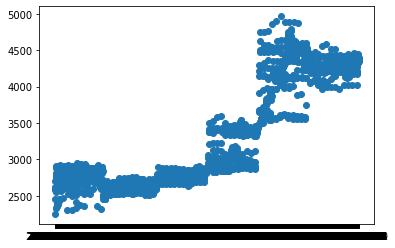

In [ ]:
#Scatter plot
plt.scatter(df.date,df.price)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


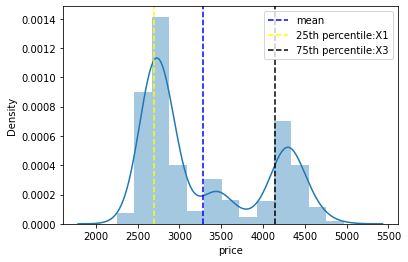

In [ ]:
# Distplot
sns.distplot(df['price'])
plt.axvline(x=np.mean(df['price']), c='blue', ls='--', label='mean')
plt.axvline(x=np.percentile(df['price'],25),c='yellow', ls='--', label = '25th percentile:X1')
plt.axvline(x=np.percentile(df['price'],75),c='black', ls='--',label = '75th percentile:X3' )
plt.legend()

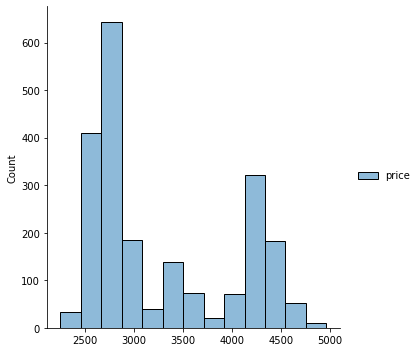

In [ ]:
sns.displot(df)

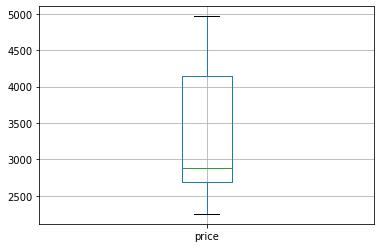

In [ ]:
# Boxplot
df.boxplot(column=["price"])

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


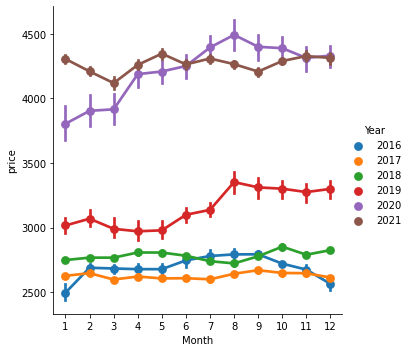

In [ ]:
# Factor plot
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
sns.factorplot(data = df, x ="Month", y = "price", hue = "Year")

In [ ]:
df1=df
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['weekday'] = df['date'].dt.weekday
df['weekday'] = np.where(df.weekday == 0, 7, df.weekday)
df_year = df[['price','Year']].groupby(by='Year').sum().reset_index()

df_year

,Year,price
0,2016,9.847648e+05
1,2017,9.587369e+05
2,2018,1.015407e+06
3,2019,1.149827e+06
4,2020,1.543195e+06
5,2021,1.514739e+06


## Monthly and seasonally Gold Price

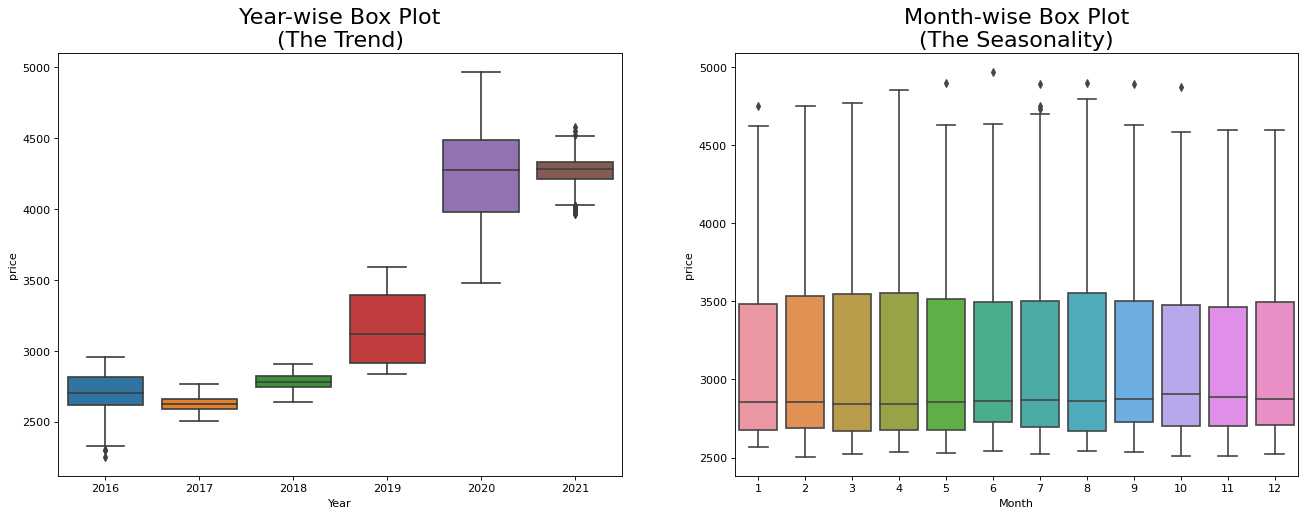

In [ ]:
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y='price', data=df, ax=axes[0])
sns.boxplot(x='Month', y='price', data=df.loc[~df.Year.isin([2016, 2021]), :])


# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=20); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=20)
plt.show()

[Text(0.5, 1.0, 'Weekly Gold Price')]

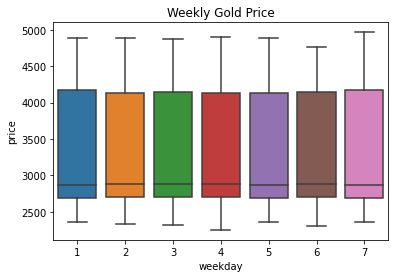

In [ ]:
plot = sns.boxplot(x='weekday', y='price', data=df1)
plot.set(title='Weekly Gold Price')

In [ ]:
# Time series with Rangeslider
import plotly.express as px
import pandas as pd



fig = px.line(df, x='date', y='price', title='Time Series with Rangeslider')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Speed up the EDA Process(Using Sweetviz)

In [ ]:
# Installing Libraries
!pip install pandas_profiling==3.1.0
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 KB 19.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 71.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.1/303.1 KB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.4/102.4 KB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 30.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=49ba6afb94934bfae064fd73630c972c1521f60279543d925fc93a6ef8135fdc
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Uninstal

In [ ]:
import pandas_profiling as pp
import sweetviz as sv
EDA_report= pp.ProfileReport(df)
EDA_report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
sweet_report = sv.analyze(df)
sweet_report.show_html('df_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report df_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Making Time Series Stationary

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

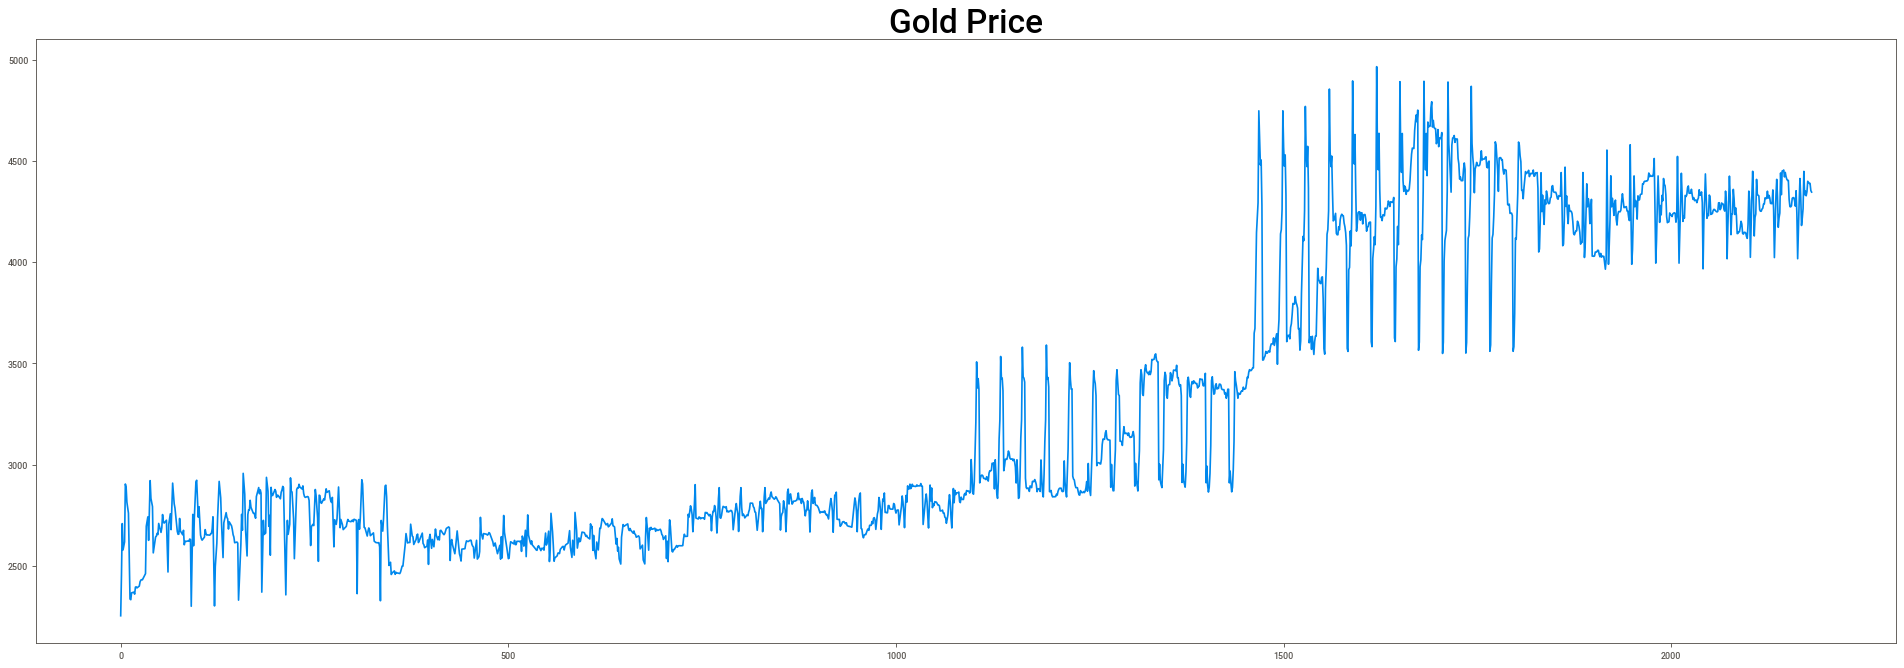

In [ ]:
plt.figure(num=None,figsize=(30,10),dpi=80,facecolor='w',edgecolor='k')
plt.title('Gold Price',fontsize=30)
plt.plot(df.price)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
 # Lets Check the given data is stationary or not
X = df.price.values
result = adfuller(X)
print('ADF Statistics: %f'%result[0])
print('p-value: %f'%result[1])

print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f'%(key,value))
 


ADF Statistics: -0.309904
p-value: 0.924090
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


If p<0.5 then data is non-stationary

In [ ]:
# Convert the non-Stationary to stationary data
df_log=np.log(df['price'])
df["price_diff"] = df_log.diff()    # Using transformation method

In [ ]:
df.isna().sum()

date          0
price         0
Year          0
Month         0
year          0
month         0
day           0
weekday       0
price_diff    1
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Augmented Dickey-Fuller Test:
result = adfuller (df['price_diff'])
print('Test statistic: %f'  %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
  print('\t%s: %.3f' %(key, value))

p=result[1]

if p>0.05:
  print('The Data Set is Not Stationary')
else:
  print('The Data Set is Stationary')

Test statistic: -21.394232
p-value: 0.000000
Critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
The Data Set is Stationary


# Time Seriers Forecast Using LSTM

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people in following work.1 They work tremendously well on a large variety of problems, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer

In [ ]:
from keras.models import Sequential
import matplotlib.patches as mpatches
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os
from scipy.interpolate import interp1d

In [ ]:
df['price'] = df['price'].interpolate()# we will fill the null row

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(df)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f9b06d1b1f0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 2000x800 with 1 Axes>

In [ ]:
df=df.values
df = df.astype('float32')

TypeError: ignored

In [ ]:
scaler= MinMaxScaler(feature_range=(-1,1))
sc = scaler.fit_transform(df)

In [ ]:
sc

In [ ]:
len(df)

In [ ]:
timestep = 30

X= []
Y=[]


for i in range(len(sc)- (timestep)):
    X.append(sc[i:i+timestep])
    Y.append(sc[i+timestep])


X=np.asanyarray(X)
Y=np.asanyarray(Y)


k = 2000
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:]   

In [ ]:
print(Xtrain.shape)
print(Xtest.shape)

In [ ]:
Xtrain

In [ ]:
Ytrain

In [ ]:
print(Ytrain.shape)
print(Ytest.shape)

## LSTM Model

In [ ]:
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()

model.add(LSTM(32,activation = 'relu', input_shape= (30,1), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=True))
model.add(LSTM(32, activation='sigmoid', return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

In [ ]:
history = model.fit(Xtrain,Ytrain,epochs=300, verbose=1)

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Accuracy")

In [ ]:
import pickle

In [ ]:
filename = 'lstm_model.pkl'
pickle.dump(model,open(filename,'wb'))

In [ ]:
model.save('lstm_mode_hemant.hp5')

In [ ]:
preds= model.predict(Xtest)
preds = scaler.inverse_transform(preds)


Ytest=np.asanyarray(Ytest)  
Ytest=Ytest.reshape(-1,1) 
Ytest = scaler.inverse_transform(Ytest)


Ytrain=np.asanyarray(Ytrain)  
Ytrain=Ytrain.reshape(-1,1) 
Ytrain = scaler.inverse_transform(Ytrain)

mean_squared_error(Ytest,preds)

In [ ]:
pre= model.predict(Xtrain)
pre = scaler.inverse_transform(pre)

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytrain , 'blue', linewidth=5)
plt.plot(pre,'r' , linewidth=4)
plt.legend(('Train','Predicted'))
plt.title("price Prediction")
plt.show()

In [ ]:
plt.figure(figsize=(20,9))
plt.plot(Ytest , 'blue', linewidth=5)
plt.plot(preds,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.title("price Prediction")
plt.show()

In [ ]:
test = pd.DataFrame(Ytest,columns=['Actual'])
pred = pd.DataFrame(preds,columns=['Predict'])
results = pd.concat([test,pred],axis=1)

In [ ]:
results.head(20)

In [ ]:
def insert_end(Xin,new_input):
    #print ('Before: \n', Xin , new_input )
    for i in range(timestep-1):
        Xin[:,i,:] = Xin[:,i+1,:]
    Xin[:,timestep-1,:] = new_input
    #print ('After :\n', Xin)
    return Xin


In [ ]:

# this section for unknown future
#we are getting next 30 steps
from datetime import timedelta
future=30
forcast = []
Xin = Xtest[-1:,:,:]
time=[]
for i in range(future):
    out = model.predict(Xin, batch_size=1)    
    forcast.append(out[0,0]) 
    print(forcast)
    Xin = insert_end(Xin,out[0,0]) 
    time.append(pd.to_datetime(df.index[-1])+timedelta(days=i+1))


In [ ]:
forcasted_output=np.asanyarray(forcast)   
forcasted_output=forcasted_output.reshape(-1,1) 
forcasted_output = scaler.inverse_transform(forcasted_output)

In [ ]:
forcasted_output = pd.DataFrame(forcasted_output)
date = pd.DataFrame(time)
df_result = pd.concat([date,forcasted_output],axis=1)
df_result.columns = "Date","Forecasted"

In [ ]:
df.columns

In [ ]:
df_result

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Gold price prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('price' ,fontsize=18)
plt.plot(df['price'][2000:])
plt.plot(df_result.set_index('Date')[['Forecasted']],"r--")


In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
  

In [ ]:
# Calculate mean squared error
mean_squared_error(Ytest, pred)

In [ ]:
# Calculate root mean squared error
rmse(Ytest, pred)

## Launch, Monitor and maintain ypr system

In [ ]:
import pickle
# Open a file , where you ant to store the data
file = open('Gold_Price.pkl', 'wb')

# Dump information to that file

pickle.dump(open, file)